In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2
import os

%matplotlib inline

In [5]:
color_dict = {0:'r', 1:'orange', 2:'g'}

[[[(134, 182), 760, 760], 1]]


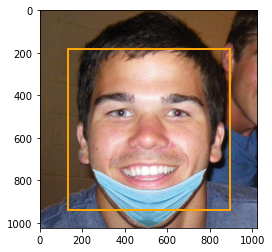

[[[(181, 227), 654, 654], 1]]


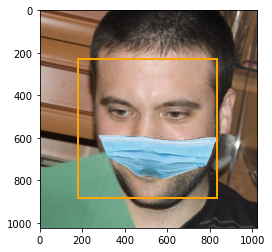

[[[(188, 243), 654, 654], 1]]


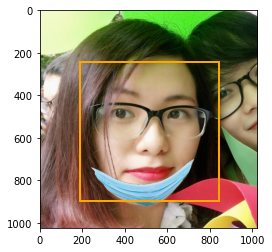

[[[(184, 219), 650, 650], 1]]


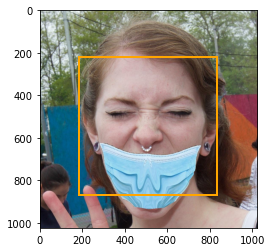

[[[(189, 226), 643, 643], 0]]


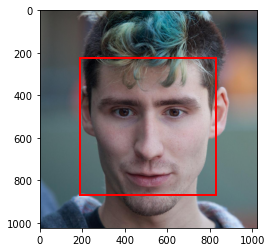

[[[(216, 255), 643, 643], 0]]


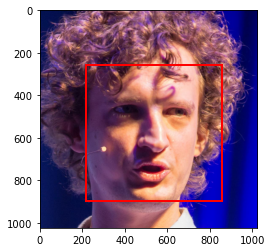

[[[(191, 211), 666, 666], 1]]


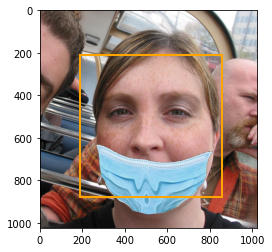

[[[(191, 224), 650, 650], 0]]


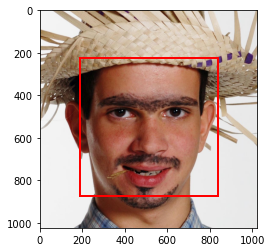

[[[(174, 218), 693, 693], 0]]


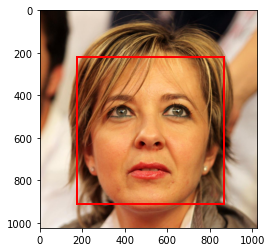

[[[(178, 228), 675, 675], 1]]


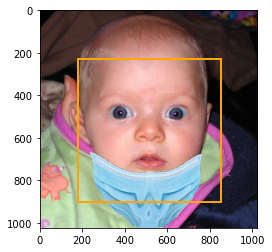

[[[(136, 170), 750, 750], 0]]


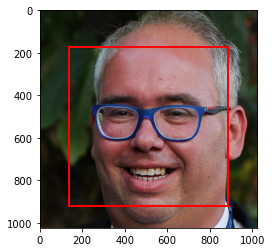

[[[(164, 196), 716, 716], 0]]


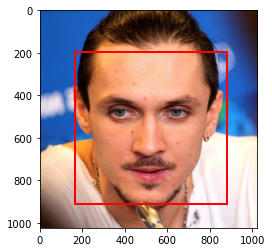

[[[(176, 261), 680, 680], 0]]


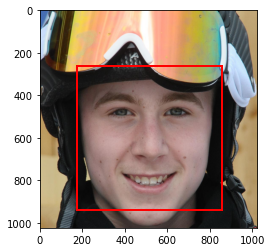

[[[(204, 250), 590, 590], 1]]


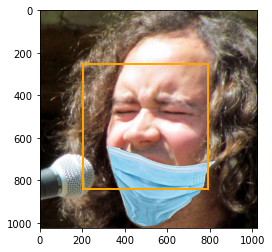

[[[(210, 247), 629, 629], 0]]


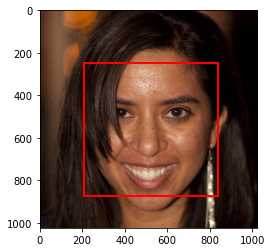

[[[(199, 245), 632, 632], 0]]


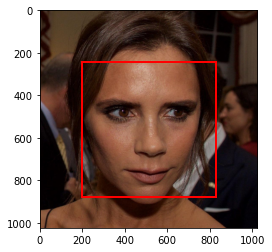

[[[(168, 205), 682, 682], 1]]


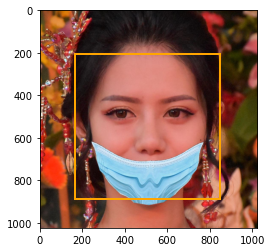

[[[(155, 213), 707, 707], 1]]


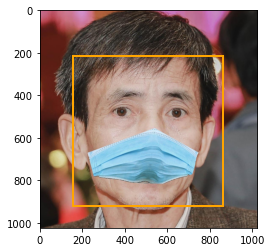

[[[(189, 247), 613, 613], 1]]


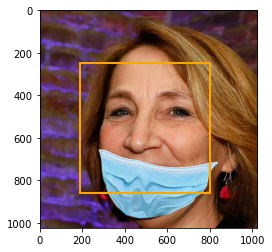

[[[(183, 237), 647, 647], 0]]


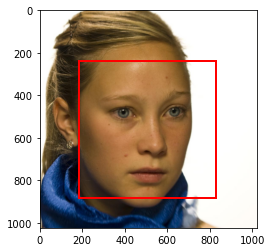

[[[(60, 31), 15, 34], 2], [[(194, 31), 14, 34], 0]]


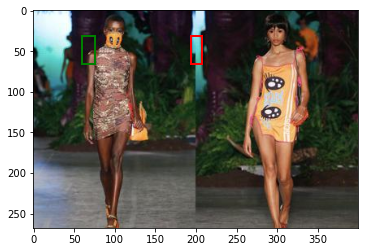

[[[(209, 282), 613, 613], 1]]


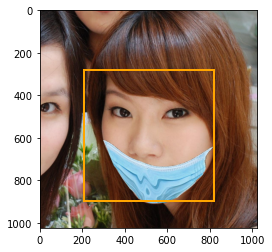

[[[(167, 206), 705, 705], 0]]


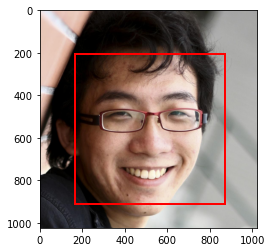

[[[(181, 199), 670, 670], 1]]


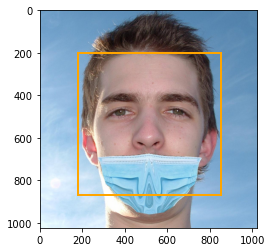

[[[(106, 104), 158, 130], 2]]


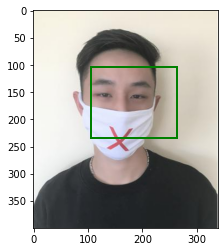

In [6]:
img_paths = ['data/images/training/'+path for path in os.listdir('data/images/training')]
annotation_paths = ['data/labels/training/'+path for path in os.listdir('data/labels/training')]

for img_path, annotation_path in zip(img_paths[:25], annotation_paths[:25]):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_RGB2BGR)
    annotation = []
    with open(annotation_path) as f:
        for line in f.readlines():
            line = [float(num) for num in line.split()]
            shape = img.shape
            label = int(line[0])
            
            norm_width = line[3]
            norm_height = line[4]
            width = int(norm_width * shape[0])
            height = int(norm_height * shape[1])
            norm_x = line[1]
            norm_y = line[2]
            x = int(norm_x * shape[0])-int(width/2.0)
            y = int(norm_y * shape[1])-int(height/2.0)
            
            annotation.append([[(x,y),width,height], label])
    print(annotation)

    
    for bbox in annotation:
        plt.gca().add_patch(Rectangle(*bbox[0], linewidth=2, edgecolor=color_dict[bbox[1]],facecolor='none'))
    
    plt.imshow(img)
    plt.show()
